Code Link: https://colab.research.google.com/drive/1xuSksE8A8hI82X6t9UqXl8YaEmGVuW-Y?usp=sharing

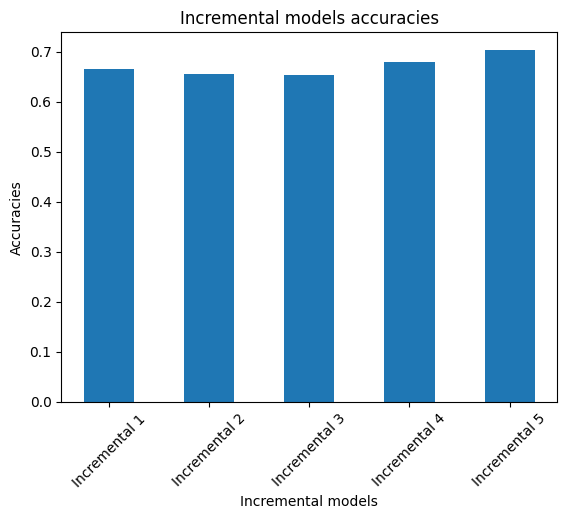

In [ ]:
import matplotlib.pyplot as plt

# data
data = [0.666, 0.655, 0.654, 0.680, 0.704]

# x-axis labels
x_labels = ['Incremental 1', 'Incremental 2', 'Incremental 3', 'Incremental 4', 'Incremental 5']

# plot the bar graph
plt.bar(x_labels, data,width=0.5)
plt.xticks(rotation=45)

# add labels for x and y axes and the title
plt.xlabel('Incremental models')
plt.ylabel('Accuracies')
plt.title('Incremental models accuracies')

# display the graph
plt.show()


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import colors
from matplotlib.colors import ListedColormap
from xgboost import XGBClassifier

In [ ]:
pip install scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skmultiflow.meta import AdaptiveRandomForestClassifier
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset link: https://docs.google.com/spreadsheets/d/1rjAqPhfnXjqpxZJvtVogk8APyyFCXXme/edit?usp=sharing&ouid=116524250140477241872&rtpof=true&sd=true



In [ ]:
cred_score = pd.read_excel('/content/drive/MyDrive/creditscore.xlsx')

In [ ]:
num_rows, num_cols = cred_score.shape

print(f'The dataset has {num_rows} rows and {num_cols} columns.')

The dataset has 100000 rows and 28 columns.


In [ ]:
cs=cred_score.sample(frac=0.1)

In [ ]:
num_rows, num_cols = cs.shape

print(f'The dataset has {num_rows} rows and {num_cols} columns.')

The dataset has 10000 rows and 28 columns.


In [ ]:
cs.describe(include='all')   # Describe function gives us a discriptive data analysis table. This can be a good starting point as it can help view discrepencies in the columns. (df.describe() by default gives discriptive summary for only the numerical columns, we can use the df.describe(include='all') to view all comumns including the categorical ones.)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,10000,10000,10000,9028,10000.0,10000,10000,10000.00,8425.000000,10000.000000,...,10000,10000.00,10000.000000,9083,10000,10000.000000,9590,10000,9864.000000,10000
unique,10000,7151,8,5924,279.0,6903,16,7532.00,NaN,NaN,...,4,7114.00,NaN,402,3,NaN,9147,7,9864.000000,3
top,0x2349a,CUS_0x93c9,June,Rothackern,31.0,#F%$D@*&8,_______,72458.44,NaN,NaN,...,Standard,2085.35,NaN,19 Years and 2 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,74.002512,Standard
freq,1,5,1278,9,309.0,522,717,5.00,NaN,NaN,...,3671,6.00,NaN,49,5262,NaN,425,2554,1.000000,5277
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4222.632797,17.460500,...,NaN,NaN,32.225757,NaN,NaN,1533.960987,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3202.960523,120.525091,...,NaN,NaN,5.151628,NaN,NaN,8694.820475,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368.374167,-1.000000,...,NaN,NaN,20.172942,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1623.664167,3.000000,...,NaN,NaN,27.927109,NaN,NaN,30.783527,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3113.321667,6.000000,...,NaN,NaN,32.244875,NaN,NaN,71.085439,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6001.201667,8.000000,...,NaN,NaN,36.486012,NaN,NaN,168.393009,NaN,NaN,NaN,NaN


In [ ]:
cs.columns.values                  # .columns.values gives us the names of the columns in our data in form of an array as below.

array(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score'],
      dtype=object)

In [ ]:
# We can then select all the columns that are importat for our analysis from the test_data. We will drop all the Names and ID columns as they are not relevent to identify the credit score.
cols= ['Age',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']

needed_data = cs[cols]


In [ ]:
# We will drop the monthly_Inhand_Salary because it is highly correlated with Annual income and it has a lot of missing values. We cn alternatively use the Anuual_Salary column to fill the missing values for monthly_salary and use the monthly_salary column for analysis.
needed_data = needed_data.drop(['Monthly_Inhand_Salary'], axis = 1)
needed_data.isnull().sum()                                         # We use .isnull().sum() to see how many of the columns have null values. Once we have an overview we can then figure our ways to get rid of the null values.

Age                           0
Annual_Income                 0
Interest_Rate                 0
Num_of_Loan                   0
Delay_from_due_date           0
Num_of_Delayed_Payment      739
Num_Credit_Inquiries        188
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age          917
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly     410
Payment_Behaviour             0
Monthly_Balance             136
Credit_Score                  0
dtype: int64

In [ ]:
# We will convert the column ['Monthly_Balance'] to string datatype to limit the number of characters in string because some of the the columns have enteries which exceed the limit of float datatype, which we will later cnvert it into for analysis.
needed_data['Monthly_Balance'] = needed_data['Monthly_Balance'].astype(str)

In [ ]:
# We use this column to restrict the characters to first 10 characters. This will cover all of the enteries for monthly balance as none of the monthly values exceed 10 digits.
needed_data['Monthly_Balance'] = needed_data['Monthly_Balance'].str[:10]

In [ ]:
# First I will convert few columns from Object to Int or Float Data Type so that we can perform analysis on the data.


needed_data['Annual_Income'] = needed_data['Annual_Income'].apply(lambda x: str(x).replace("_"," "))
# Annual income column has a lot of unclean data with '_' at the end or starting of the string. We will replace them with space.
needed_data['Num_of_Delayed_Payment'] = needed_data['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("None","0"))
# Num_of_Delayed_Payment column has None, nan for null values. WE can replace them with '0'.
needed_data['Num_of_Delayed_Payment'] = needed_data['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("_"," "))
# Num_of_Delayed_Payment column has a lot of unclean data with '_' at the end or starting of the string. We will replace them with space.
needed_data['Num_of_Delayed_Payment'] = needed_data['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("nan","0"))
# Similarly we can clean data for other columns.
needed_data['Num_of_Delayed_Payment'] = pd.to_numeric(needed_data['Num_of_Delayed_Payment'])
needed_data['Outstanding_Debt'] = needed_data['Outstanding_Debt'].apply(lambda x: str(x).replace("_"," "))
needed_data['Outstanding_Debt'] = pd.to_numeric(needed_data['Outstanding_Debt'])
# We will use the to_numeric() function to convert the values from strng to integer.
needed_data['Amount_invested_monthly'] = needed_data['Amount_invested_monthly'].apply(lambda x: str(x).replace("_"," "))
needed_data['Amount_invested_monthly'] = needed_data['Amount_invested_monthly'].apply(lambda x: str(x).replace("nan","0"))
needed_data['Amount_invested_monthly'] = needed_data['Amount_invested_monthly'].apply(lambda x: str(x).replace("None","0"))
needed_data['Amount_invested_monthly'] = pd.to_numeric(needed_data['Amount_invested_monthly'])
needed_data['Monthly_Balance'] = needed_data['Monthly_Balance'].apply(lambda x: str(x).replace("_"," "))
needed_data['Monthly_Balance'] = needed_data['Monthly_Balance'].apply(lambda x: str(x).replace("None","0"))
needed_data['Monthly_Balance'] = needed_data['Monthly_Balance'].apply(lambda x: str(x).replace("nan","0"))
needed_data['Monthly_Balance'] = pd.to_numeric(needed_data['Monthly_Balance'])
needed_data['Annual_Income'] = pd.to_numeric(needed_data['Annual_Income'])
needed_data['Age'] = needed_data['Age'].apply(lambda x: str(x).replace("_"," "))
needed_data['Age'] = pd.to_numeric(needed_data['Age'])
needed_data['Num_of_Loan'] = needed_data['Num_of_Loan'].apply(lambda x: str(x).replace("_"," "))
needed_data['Num_of_Loan'] = pd.to_numeric(needed_data['Num_of_Loan'])

In [ ]:

needed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 92604 to 41604
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10000 non-null  int64  
 1   Annual_Income             10000 non-null  float64
 2   Interest_Rate             10000 non-null  int64  
 3   Num_of_Loan               10000 non-null  int64  
 4   Delay_from_due_date       10000 non-null  int64  
 5   Num_of_Delayed_Payment    10000 non-null  int64  
 6   Num_Credit_Inquiries      9812 non-null   float64
 7   Credit_Mix                10000 non-null  object 
 8   Outstanding_Debt          10000 non-null  float64
 9   Credit_Utilization_Ratio  10000 non-null  float64
 10  Credit_History_Age        9083 non-null   object 
 11  Payment_of_Min_Amount     10000 non-null  object 
 12  Total_EMI_per_month       10000 non-null  float64
 13  Amount_invested_monthly   10000 non-null  float64
 14  Pa

In [ ]:
# We will view the data to figure out the further analysis.
needed_data.describe(include = 'all')

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,9812.000000,10000,10000.000000,10000.000000,9083,10000,10000.000000,10000.000000,10000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,402,3,NaN,NaN,7,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,19 Years and 2 Months,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3671,NaN,NaN,49,5262,NaN,NaN,2554,NaN,5277
mean,112.446600,1.860939e+05,75.613200,2.239400,21.127600,26.473600,27.315022,NaN,1434.084837,32.225757,NaN,NaN,1533.960987,606.075627,NaN,398.319981,NaN
std,690.525459,1.444336e+06,468.448642,58.454931,14.895694,195.020359,195.075857,NaN,1157.795355,5.151628,NaN,NaN,8694.820475,1989.167207,NaN,218.643245,NaN
min,-500.000000,7.005930e+03,1.000000,-100.000000,-5.000000,-3.000000,0.000000,NaN,0.230000,20.172942,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN
25%,24.000000,1.960561e+04,8.000000,1.000000,10.000000,8.000000,3.000000,NaN,566.770000,27.927109,NaN,NaN,30.783527,68.528851,NaN,268.450349,NaN
50%,33.000000,3.798465e+04,14.000000,3.000000,18.000000,13.000000,6.000000,NaN,1170.660000,32.244875,NaN,NaN,71.085439,129.712819,NaN,334.800385,NaN
75%,42.000000,7.369114e+04,20.000000,5.000000,28.000000,18.000000,9.000000,NaN,1965.560000,36.486012,NaN,NaN,168.393009,257.563149,NaN,469.611846,NaN


In [ ]:
nd= needed_data.copy()
nd['Credit_History_Age'] = nd['Credit_History_Age'].replace('nan', np.nan).fillna(0)
nd['Credit_History_Age'] = nd['Credit_History_Age'].astype(str)
nd['History_Year'] = nd['Credit_History_Age'].str[ :2]
nd['History_Month'] = nd['Credit_History_Age'].str[ -9:-7]

In [ ]:
nd['History_Year'] = pd.to_numeric(nd['History_Year'])
nd['History_Month'] = pd.to_numeric(nd['History_Month'])
nd['Credit_History_Age'] = nd['History_Year']*12 + nd['History_Month']
nd = nd.drop(['History_Year'], axis = 1)
nd = nd.drop(['History_Month'], axis = 1)
nd

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
92604,41,52847.32,13,2,26,11,3.0,Standard,517.77,27.490244,263.0,No,57.657773,0.000000,Low_spent_Small_value_payments,74.002512,Standard
44205,53,21568.28,9,0,27,17,2.0,_,1039.53,36.026560,232.0,No,0.000000,162.383280,Low_spent_Small_value_payments,288.252386,Good
95099,19,59908.77,29,5,21,2081,9.0,Standard,1323.98,22.682617,NaN,Yes,44788.000000,323.845515,High_spent_Small_value_payments,287.969829,Poor
67929,30,38735.57,3,2,15,11,2.0,Good,800.94,34.980591,203.0,No,43.943751,38.303350,High_spent_Medium_value_payments,486.549315,Good
19521,18,18507.00,14,4,29,0,4.0,Standard,1814.83,33.309338,NaN,NM,34.039146,132.679165,Low_spent_Medium_value_payments,269.406688,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66851,33,16540.95,9,4,8,16,0.0,Good,794.61,34.467657,310.0,NM,53.659096,19.948454,High_spent_Medium_value_payments,287.033700,Poor
69596,37,74169.76,27,2,36,24,15.0,_,2529.47,34.796029,179.0,Yes,87.825391,44.388395,High_spent_Large_value_payments,725.267546,Poor
83662,19,40692.40,18,6,34,17,12.0,Bad,4128.29,25.101158,70.0,Yes,200.626613,111.474609,High_spent_Small_value_payments,316.502110,Poor
43507,26,83962.92,26,6,62,14,11.0,_,1978.10,28.184403,NaN,Yes,416.608807,215.256848,High_spent_Medium_value_payments,333.025345,Poor


Encode data

In [ ]:
{column: list(nd[column].unique()) for column in nd.select_dtypes('object').columns}

{'Credit_Mix': ['Standard', '_', 'Good', 'Bad'],
 'Payment_of_Min_Amount': ['No', 'Yes', 'NM'],
 'Payment_Behaviour': ['Low_spent_Small_value_payments',
  'High_spent_Small_value_payments',
  'High_spent_Medium_value_payments',
  'Low_spent_Medium_value_payments',
  'High_spent_Large_value_payments',
  '!@9#%8',
  'Low_spent_Large_value_payments'],
 'Credit_Score': ['Standard', 'Good', 'Poor']}

In [ ]:
nd = nd[nd.Payment_Behaviour != '!@9#%8']
nd = nd[nd.Payment_of_Min_Amount != 'NM']

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
Credit_Mix_order = [ '_',
                    'Bad',
                    'Standard',
                    'Good']

Payment_Behaviour_order = ['Low_spent_Small_value_payments',
                          'Low_spent_Medium_value_payments',
                          'High_spent_Small_value_payments',
                          'Low_spent_Large_value_payments',
                           'High_spent_Medium_value_payments',
                           'High_spent_Large_value_payments']

Credit_Score_order = ['Poor',
                      'Standard',
                      'Good' ]


nd = ordinal_encode(nd, 'Credit_Mix', ordering = Credit_Mix_order)
nd= ordinal_encode(nd, 'Payment_Behaviour', ordering = Payment_Behaviour_order )
nd= ordinal_encode(nd, 'Credit_Score', ordering = Credit_Score_order )


nd = onehot_encode(nd, 'Payment_of_Min_Amount', prefix = 'PMA' )


In [ ]:
cleaned_data = nd

Exploratory data analysis

In [ ]:
cleaned_data.describe()

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,PMA_No,PMA_Yes
count,8168.000000,8.168000e+03,8168.000000,8168.000000,8168.000000,8168.000000,8008.000000,8168.000000,8168.000000,8168.000000,7424.00000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000
mean,109.526445,1.963229e+05,75.040402,2.110553,21.177767,27.441234,26.999126,1.644221,1432.140377,32.199961,220.44181,1563.703464,614.715726,2.243511,398.097657,0.880387,0.403648,0.596352
std,675.948416,1.488196e+06,465.983642,54.660990,14.950119,203.317473,193.327760,1.055118,1159.813761,5.145534,100.34166,8828.595445,2007.673053,1.853144,219.335400,0.672187,0.490659,0.490659
min,-500.000000,7.005930e+03,1.000000,-100.000000,-5.000000,-3.000000,0.000000,0.000000,0.340000,20.172942,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.957518e+04,8.000000,1.000000,10.000000,8.000000,3.000000,1.000000,566.770000,27.902815,142.00000,30.306321,69.348631,0.000000,267.991211,0.000000,0.000000,0.000000
50%,33.000000,3.792122e+04,14.000000,3.000000,18.000000,13.000000,6.000000,2.000000,1159.840000,32.216955,219.00000,70.466555,129.069718,2.000000,334.328827,1.000000,0.000000,1.000000
75%,42.000000,7.355166e+04,20.000000,5.000000,28.000000,18.000000,9.000000,2.000000,1963.687500,36.397171,302.00000,166.166450,259.285594,4.000000,468.206914,1.000000,1.000000,1.000000
max,8678.000000,2.388456e+07,5697.000000,1465.000000,66.000000,4164.000000,2586.000000,3.000000,4998.070000,49.522324,403.00000,82236.000000,10000.000000,5.000000,1566.613160,2.000000,1.000000,1.000000


Reletive Plot Of Features


<Figure size 200x200 with 0 Axes>

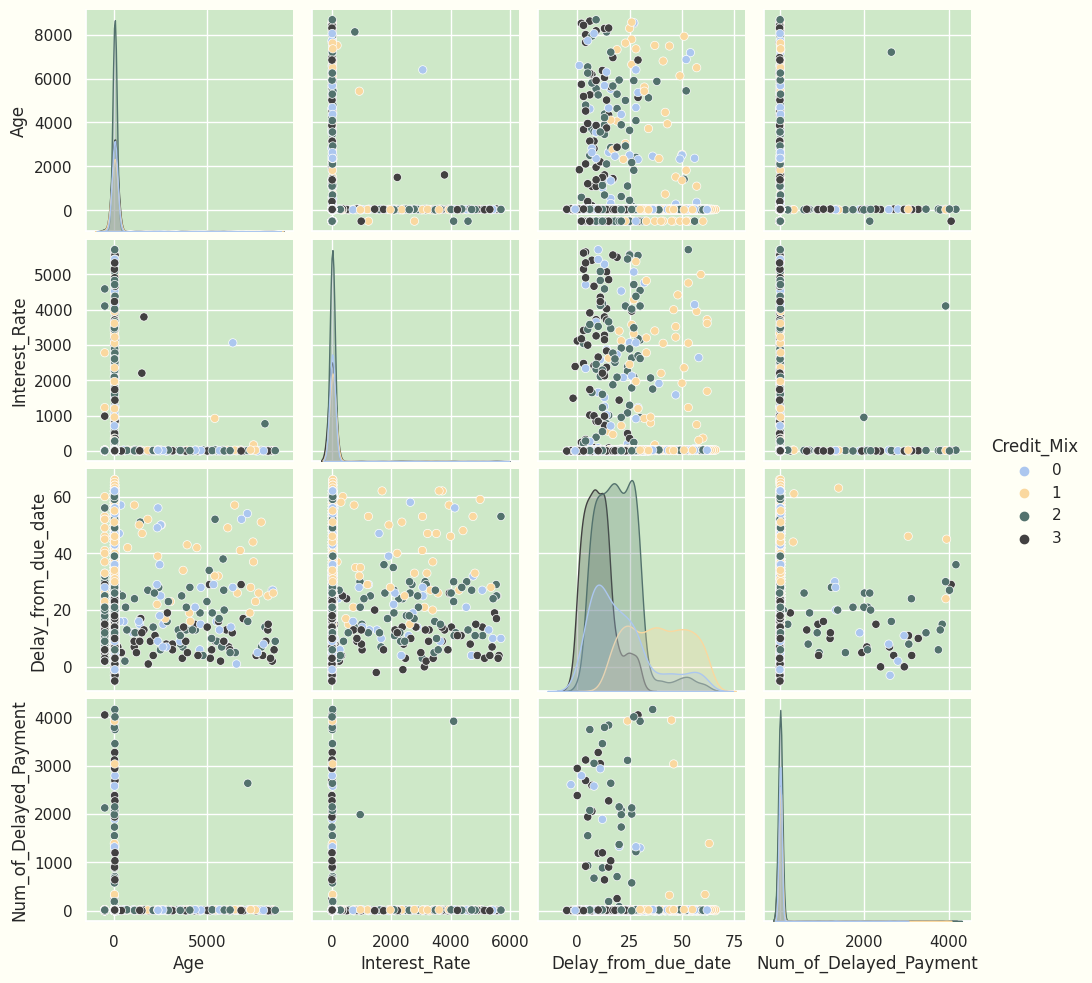

In [ ]:
sns.set(rc={"axes.facecolor":"#CEE8C8","figure.facecolor":"#FFFFF5"})
pallet = ["#FAD89F", "#53726D", "#424141", "#FFFFF5"]
cmap = colors.ListedColormap(["#ACC7EF", "#FAD89F", "#53726D", "#424141", "#FFFFF5"])

To_Plot = [ "Age", "Interest_Rate", "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix"]
print("Reletive Plot Of Features")
plt.figure(figsize=(2,2))
sns.pairplot(cleaned_data[To_Plot], hue= "Credit_Mix", palette= (["#ACC7EF", "#FAD89F", "#53726D", "#424141"]))

plt.show()


Reducing Skewness & outliers

In [ ]:
q = cleaned_data['Interest_Rate'].quantile(0.95)
cleaned_data = cleaned_data[cleaned_data['Interest_Rate']<q]

cleaned_data['Num_of_Loan'] = cleaned_data['Num_of_Loan'].apply(lambda x: str(x).replace("-","0"))
cleaned_data['Num_of_Loan'] = cleaned_data['Num_of_Loan'].str[ :1]
cleaned_data['Num_of_Loan'] = pd.to_numeric(cleaned_data['Num_of_Loan'])

cleaned_data['Age'] = cleaned_data['Age'].apply(lambda x: str(x).replace("-"," "))
cleaned_data['Age'] = cleaned_data['Age'].str[ :3]
cleaned_data['Age'] = pd.to_numeric(cleaned_data['Age'])
cleaned_data = cleaned_data[(cleaned_data["Age"]> 18)]
cleaned_data = cleaned_data[(cleaned_data["Age"]< 100)]

cleaned_data['Delay_from_due_date'] = cleaned_data['Delay_from_due_date'].apply(lambda x: str(x).replace("-"," "))
cleaned_data['Delay_from_due_date'] = pd.to_numeric(cleaned_data['Delay_from_due_date'])

cleaned_data['Num_of_Delayed_Payment'] = cleaned_data['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("-"," "))
cleaned_data['Num_of_Delayed_Payment'] = pd.to_numeric(cleaned_data['Num_of_Delayed_Payment'])

q = cleaned_data['Num_of_Delayed_Payment'].quantile(0.95)
cleaned_data = cleaned_data[cleaned_data['Num_of_Delayed_Payment']<q]
cleaned_data = cleaned_data.fillna('0')

cleaned_data.describe()

<ipython-input-73-7f63dfd6a0f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Num_of_Loan'] = cleaned_data['Num_of_Loan'].apply(lambda x: str(x).replace("-","0"))
<ipython-input-73-7f63dfd6a0f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Num_of_Loan'] = cleaned_data['Num_of_Loan'].str[ :1]
<ipython-input-73-7f63dfd6a0f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,PMA_No,PMA_Yes
count,3248.000000,3.248000e+03,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000
mean,35.524631,1.817451e+05,12.635776,3.019397,18.530788,11.418411,1.762007,1215.976746,32.349113,1178.119749,626.296367,2.268165,416.661261,0.977833,0.487069,0.512931
std,10.058560,1.407252e+06,7.453957,2.334103,13.093689,6.336532,1.078535,1012.217595,5.170589,7250.149211,2015.249774,1.850547,228.719163,0.663261,0.499910,0.499910
min,19.000000,7.020545e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.770000,21.027665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,2.056013e+04,7.000000,1.000000,9.000000,7.000000,1.000000,516.445000,28.071735,25.855629,71.081719,0.000000,275.945746,1.000000,0.000000,0.000000
50%,35.000000,3.938949e+04,11.000000,3.000000,16.000000,12.000000,2.000000,1008.450000,32.268906,64.206352,138.108725,2.000000,350.292285,1.000000,0.000000,1.000000
75%,43.000000,7.979510e+04,18.000000,4.000000,26.000000,17.000000,3.000000,1455.462500,36.660225,153.354948,270.212644,4.000000,497.003427,1.000000,1.000000,1.000000
max,56.000000,2.388456e+07,31.000000,9.000000,64.000000,22.000000,3.000000,4986.030000,47.927665,79454.000000,10000.000000,5.000000,1518.393440,2.000000,1.000000,1.000000


Reletive Plot Of Features


<Figure size 2000x2000 with 0 Axes>

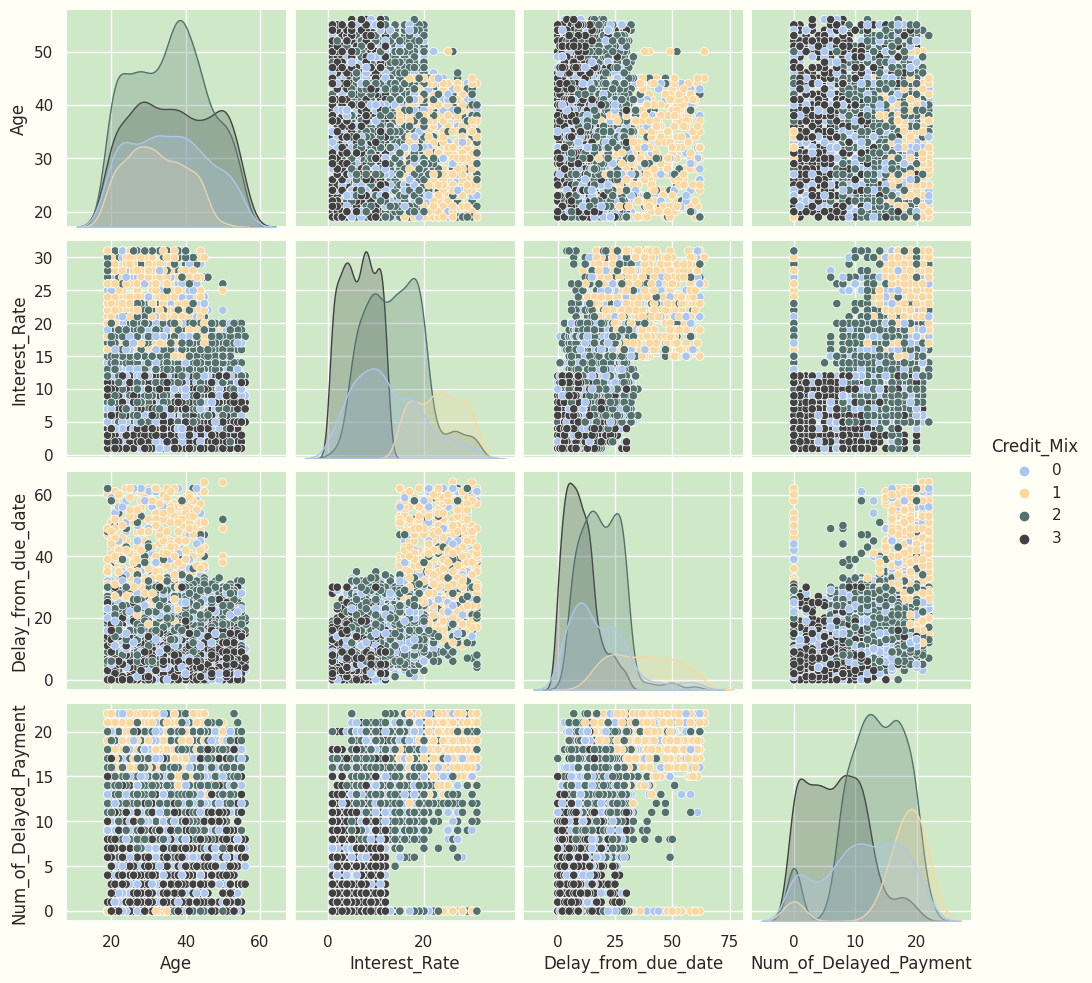

In [ ]:
sns.set(rc={"axes.facecolor":"#CEE8C8","figure.facecolor":"#FFFFF5"})
pallet = ["#FAD89F", "#53726D", "#424141", "#FFFFF5"]
cmap = colors.ListedColormap(["#ACC7EF", "#FAD89F", "#53726D", "#424141", "#FFFFF5"])
To_Plot = [ "Age", "Interest_Rate", "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix"]
print("Reletive Plot Of Features")
plt.figure(figsize=(20,20))
sns.pairplot(cleaned_data[To_Plot], hue= "Credit_Mix", palette= (["#ACC7EF", "#FAD89F", "#53726D", "#424141"]))
plt.show()



<ipython-input-75-8599cd010a61>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= cleaned_data.corr()


<Axes: >

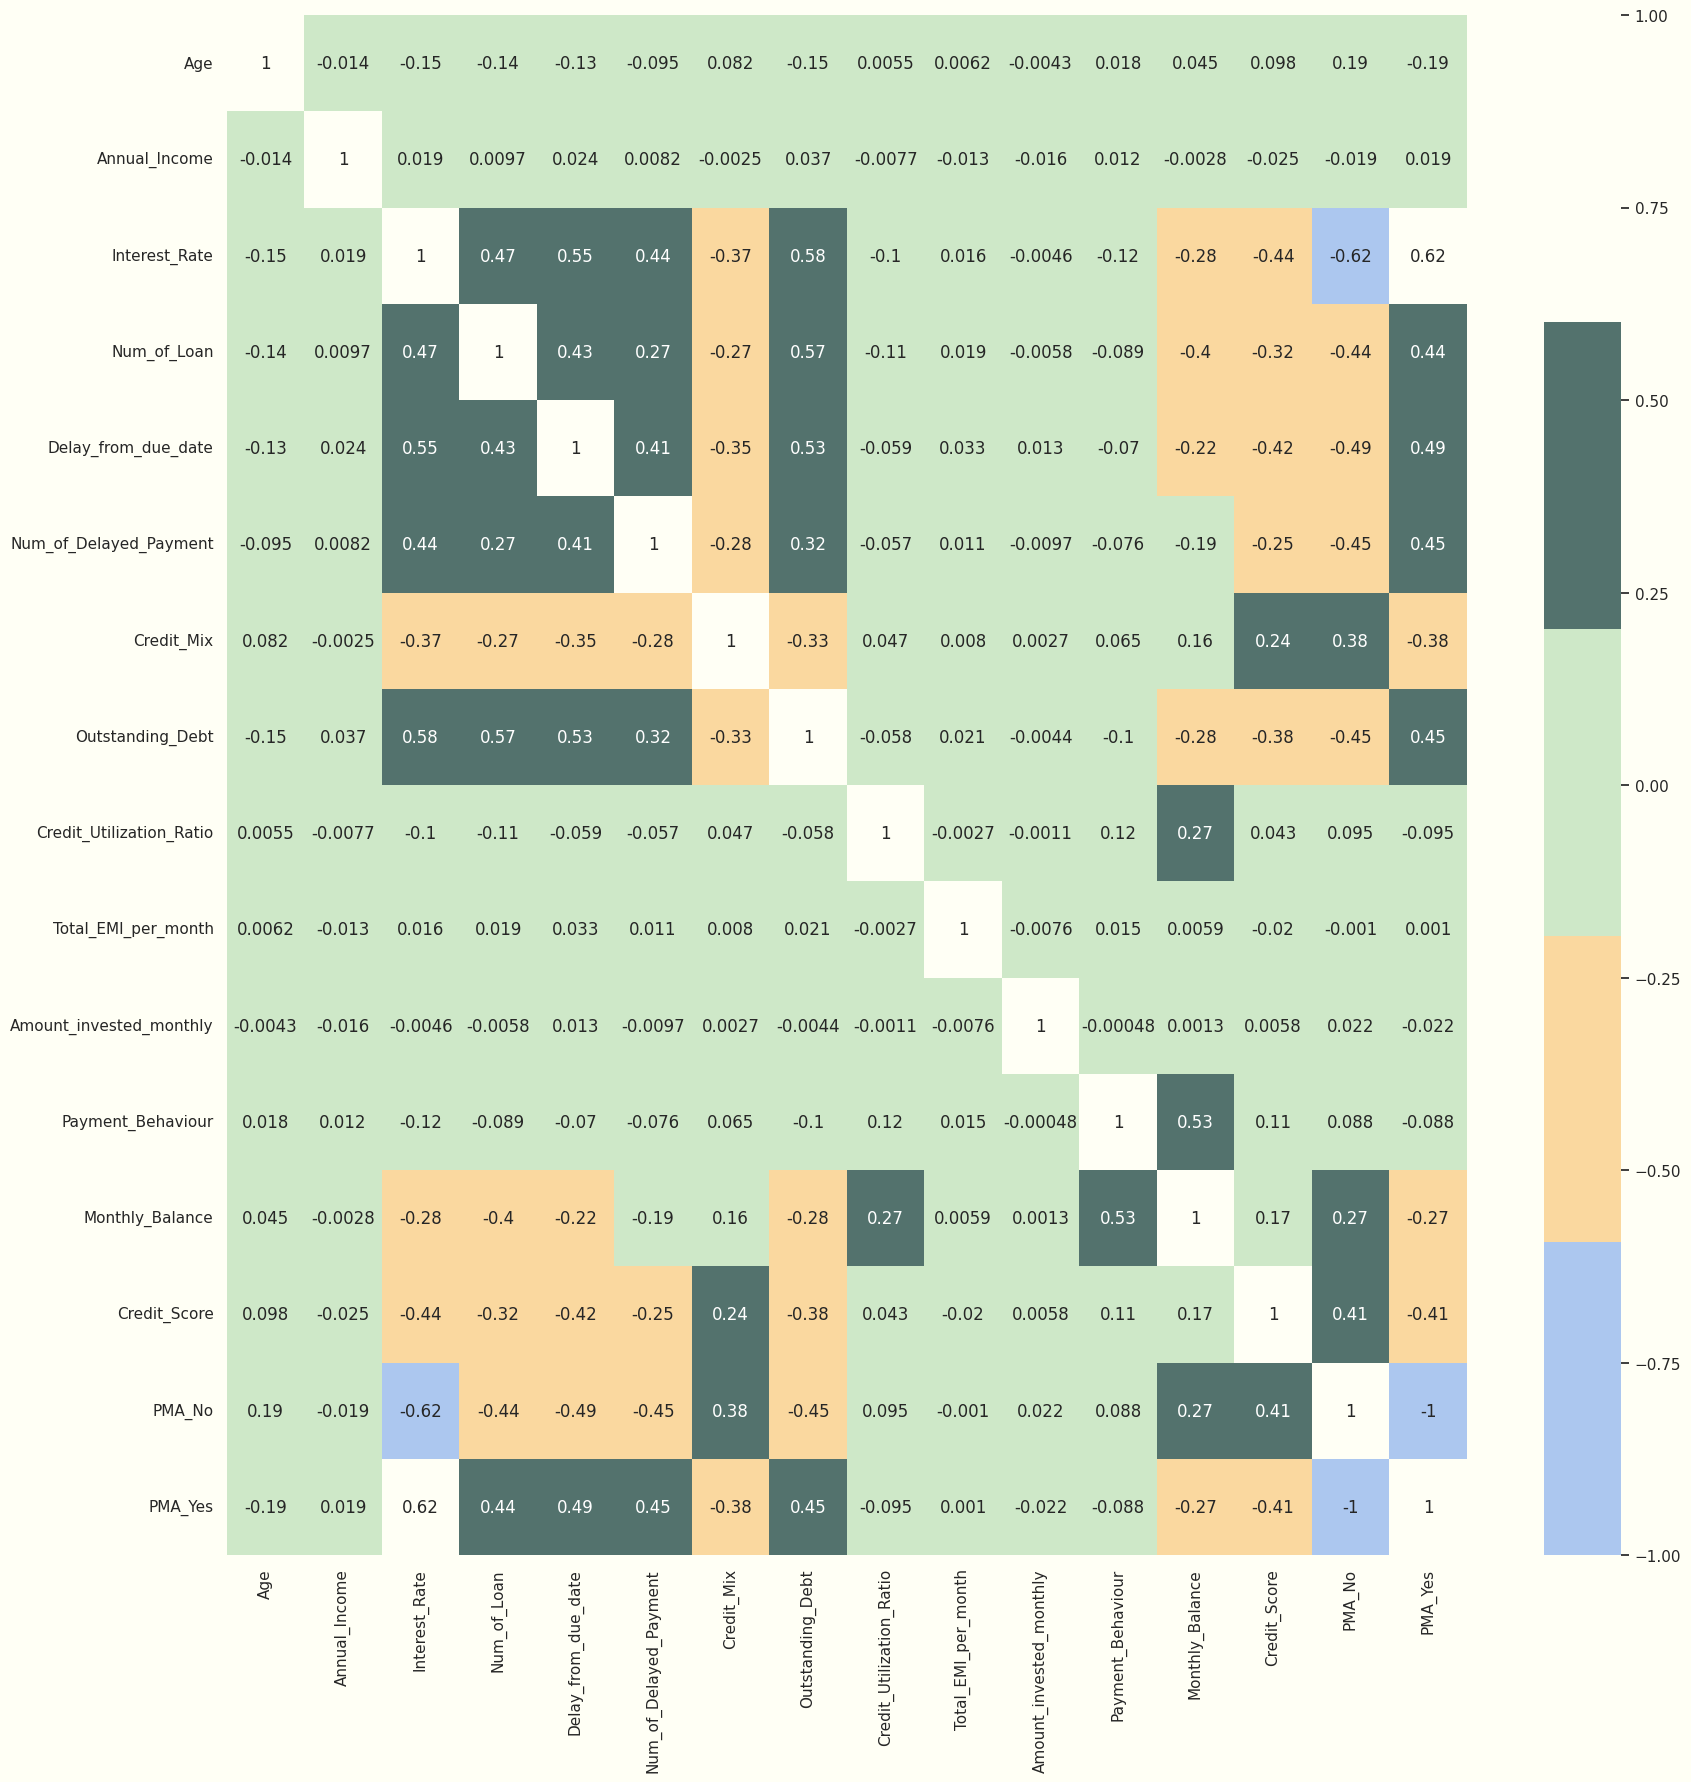

In [ ]:
sns.set(rc={"axes.facecolor":"#CEE8C8","figure.facecolor":"#FFFFF5"})
pallet = ["#FAD89F", "#CEE8C8", "#53726D", "#FFFFF5"]
cmap = colors.ListedColormap(["#ACC7EF", "#FAD89F", "#CEE8C8", "#53726D", "#FFFFF5"])
corrmat= cleaned_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Splitting dataset

In [ ]:
Y = cleaned_data['Credit_Score'].copy()
X = cleaned_data.drop(('Credit_Score'), axis=1).copy()

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X.describe(include = 'all')

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,PMA_No,PMA_Yes
count,3.248000e+03,3.248000e+03,3.248000e+03,3.248000e+03,3.248000e+03,3.248000e+03,3248.000000,3.248000e+03,3.248000e+03,3.248000e+03,3.248000e+03,3.248000e+03,3.248000e+03,3.248000e+03,3.248000e+03,3.248000e+03,3.248000e+03
mean,-4.265882e-17,-9.844342e-18,-1.028187e-16,1.695414e-17,8.203618e-17,-8.531763e-17,0.000000,-4.375263e-17,1.771982e-16,4.659655e-16,3.062684e-17,1.859487e-17,5.031553e-17,4.047118e-17,-9.516197e-17,8.750526e-18,-4.703408e-17
std,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00
min,-1.643096e+00,-1.241792e-01,-1.561260e+00,-1.293799e+00,-1.415464e+00,-1.802274e+00,-0.132632,-1.633956e+00,-1.200724e+00,-2.189923e+00,-1.904707e+00,-1.625210e-01,-3.108264e-01,-1.225862e+00,-1.821996e+00,-9.744639e-01,-1.026205e+00
25%,-8.476306e-01,-1.145564e-01,-7.561948e-01,-8.653034e-01,-7.280038e-01,-6.973991e-01,-0.120868,-7.066297e-01,-6.911947e-01,-8.273790e-01,-6.424639e-01,-1.589542e-01,-2.755490e-01,-1.225862e+00,-6.153275e-01,-9.744639e-01,-1.026205e+00
50%,-5.216565e-02,-1.011741e-01,-2.194845e-01,-8.311346e-03,-1.933128e-01,9.179756e-02,-0.109103,2.206969e-01,-2.050534e-01,-1.551449e-02,7.135629e-02,-1.536637e-01,-2.422840e-01,-1.449335e-01,-2.902214e-01,-9.744639e-01,9.744639e-01
75%,7.432993e-01,-7.245727e-02,7.197586e-01,4.201847e-01,5.705315e-01,8.809942e-01,-0.091456,1.148023e+00,2.366316e-01,8.339042e-01,8.221733e-01,-1.413657e-01,-1.767218e-01,9.359945e-01,3.513240e-01,1.026205e+00,9.744639e-01
max,2.035930e+00,1.684592e+01,2.464067e+00,2.562665e+00,3.473140e+00,1.670191e+00,14.949775,1.148023e+00,3.725122e+00,3.013380e+00,1.612163e+00,1.079811e+01,4.652102e+00,1.476458e+00,4.817707e+00,1.026205e+00,9.744639e-01


Classification models

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [ ]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
models = [
    BaggingClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

for model in models:
    model.fit(X_train, Y_train)

In [ ]:
model_names = [
    "Bagging classifier",
    "Extra Trees",
    "Random Forest",
    "XG Classifier",
    "AdaBoost classifier"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(X_test, Y_test) * 100))

Bagging classifier: 64.0000%
Extra Trees: 68.0000%
Random Forest: 67.5385%
XG Classifier: 65.5385%
AdaBoost classifier: 64.1538%


We can see that only the random forest model performs decently . We can dive into which columns of data is redundant and can use other ensemble techniques to make a better model

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.base import clone
import numpy as np
from imblearn.over_sampling import SMOTE

class IncrementalEnsemble:
    def __init__(self, base_estimator, n_estimators):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.ensemble = []

    def fit(self, X, y):
        for i in range(self.n_estimators):
            estimator = clone(self.base_estimator)
            X_i, y_i = self._sample(X, y)
            estimator.fit(X_i, y_i)
            self.ensemble.append(estimator)

    def predict(self, X):
        predictions = []
        for estimator in self.ensemble:
            y_pred = estimator.predict(X)
            predictions.append(y_pred)
        return np.mean(predictions, axis=0)

    def _sample(self, X, y):
        n_samples = X.shape[0]
        sample_indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X.iloc[sample_indices], y.iloc[sample_indices]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [ ]:
base_estimators = {
    'random forest': RandomForestClassifier(n_estimators=1000,random_state=42),
    'bagging': BaggingClassifier(),
    'extra trees':ExtraTreesClassifier(),
    'XG classifier':XGBClassifier(),
    'AdaBoost classifier':AdaBoostClassifier()
}

bin_edges = [0, 1, 2, 3]

predictions = {}
for label, estimator in base_estimators.items():
  ensemble = IncrementalEnsemble(base_estimator=estimator, n_estimators=10)
  ensemble.fit(X_train, y_train)
  y_pred = ensemble.predict(X_test)
  y_discrete = np.digitize(y_pred, bin_edges) - 1
  predictions[label] = y_discrete

ValueError: ignored

In [ ]:
predictions

{'random forest': array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0,
        0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        2, 1, 0, 1, 0

In [ ]:
y_test

In [ ]:
accuracy = accuracy_score(y_test, y_discrete)
f1 = f1_score(y_test, y_discrete, average='weighted')
p1 = precision_score(y_test, y_discrete, average='weighted')
r1 = recall_score(y_test, y_discrete, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100))
print("F1 Score: %.2f%%" % (f1 * 100))
print("Precision: %.2f%%" % (p1 * 100))
print("Recall: %.2f%%" % (r1 * 100))


In [ ]:
accuracies = {}
f1s = {}
precisions = {}
recalls = {}

for label, pred in predictions.items():
  accuracies[label] = accuracy_score(y_test,y_discrete) * 100
  f1s[label] = f1_score(y_test, pred, average='weighted') * 100
  precisions[label] = precision_score(y_test, pred, average='weighted') * 100
  recalls[label] = recall_score(y_test, pred, average='weighted') * 100

In [ ]:
colwidth = 20
print(' | '.join(map(lambda x: x.ljust(colwidth), ['', *predictions.keys()])))

for metric_label, metric in [('accuracy', accuracies), ('f1', f1s),('precision',precisions),('recall',recalls)]:
  print(metric_label.rjust(colwidth), end=' | ')
  print(' | '.join(map(lambda x: str(round(x, 3)).ljust(colwidth), metric.values())))


weighted average: Computes the metric for each class separately and then takes the weighted average based on the number of samples in each class.

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_pred_bin = label_binarize(y_discrete, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green','yellow']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='ROC curve (AUC = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclass')
plt.legend(loc="lower right")
plt.show()

Comparing this model with other library based models


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier,ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
ada_precision = precision_score(y_test, y_pred_ada,average='weighted')
ada_recall = recall_score(y_test, y_pred_ada,average='weighted')
as_ada=accuracy_score(y_test, y_pred_ada)
f1_ada=f1_score(y_test, y_pred_ada,average='weighted')
print('AdaBoostClassifier:')
print('Precision:', ada_precision)
print('Recall:', ada_recall)
print('Accuracy:', as_ada)
print('F1 Score:', f1_ada)

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
gb_precision = precision_score(y_test, y_pred_gb,average='weighted')
gb_recall = recall_score(y_test, y_pred_gb,average='weighted')
as_gb=accuracy_score(y_test, y_pred_gb)
f1_gb=f1_score(y_test, y_pred_gb,average='weighted')
print('GradientBoostingClassifier:')
print('Precision:', gb_precision)
print('Recall:', gb_recall)
print('Accuracy:', as_gb)
print('F1 Score:', f1_gb)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_precision = precision_score(y_test, y_pred_rf,average='weighted')
rf_recall = recall_score(y_test, y_pred_rf,average='weighted')
as_rf=accuracy_score(y_test, y_pred_rf)
f1_rf=f1_score(y_test, y_pred_rf,average='weighted')
print('RandomForestClassifier:')
print('Precision:', rf_precision)
print('Recall:', rf_recall)
print('Accuracy:', as_rf)
print('F1 Score:', f1_rf)

xg = XGBClassifier(n_estimators=100, random_state=42)
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
xg_precision = precision_score(y_test, y_pred_xg,average='weighted')
xg_recall = recall_score(y_test, y_pred_xg,average='weighted')
as_xg=accuracy_score(y_test, y_pred_xg)
f1_xg=f1_score(y_test, y_pred_xg,average='weighted')
print('XGBoostClassifier:')
print('Precision:', xg_precision)
print('Recall:', xg_recall)
print('Accuracy:', as_xg)
print('F1 Score:', f1_xg)

et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)
et_precision = precision_score(y_test, y_pred_et,average='weighted')
et_recall = recall_score(y_test, y_pred_et,average='weighted')
as_et=accuracy_score(y_test, y_pred_et)
f1_et=f1_score(y_test, y_pred_et,average='weighted')
print('ExtraTreesClassifier:')
print('Precision:', et_precision)
print('Recall:', et_recall)
print('Accuracy:', as_et)
print('F1 Score:', f1_et)


In [ ]:
model_names = ['Incremental Model','Adaboost', 'Gradient Boosting', 'Random Forest','XG Boost','Extra Trees']
accuracy_scores = [accuracy,as_ada,as_gb,as_rf,as_xg,as_et]

fig, ax = plt.subplots()
ax.bar(model_names, accuracy_scores,width=0.5)
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')

plt.xticks(rotation=45)
plt.show()

In [ ]:
model_names = ['Incremental Model','Adaboost', 'Gradient Boosting', 'Random Forest','XG Boost','Extra Trees']
f1s = [f1,f1_ada,f1_gb,f1_rf,f1_xg,f1_et]

fig, ax = plt.subplots()
ax.bar(model_names, f1s,width=0.5)
ax.set_ylabel('F1_Score')
ax.set_title('Model Comparison')

plt.xticks(rotation=45)
plt.show()